# Analyzing behavior-only sessions from the Visual Behavior Neuropixels dataset

In addition to the behavior sessions that accompany Neuropixels recordings, we have also released the training sessions for each mouse as standalone NWB files.

The following tutorial will demonstrate how to load these sessions for an example mouse. We'll cover the following topics:

* <a href='#Finding-behavior-sessions-to-analyze'>Finding behavior sessions to analyze</a>
* <a href='#Loading-behavior-data'>Loading behavior data</a>
* <a href='#Understanding-behavior-session-contents'>Understanding the behavior session contents</a>


This tutorial assumes you've already created a data cache, or are working with the files on AWS. If you haven't reached that step yet, we recommend going through the [data access tutorial](https://allensdk.readthedocs.io/en/latest/visual_behavior_neuropixels.html) first.

You can read more about the stages of behavioral training in the [white paper](https://brainmapportal-live-4cc80a57cd6e400d854-f7fdcae.divio-media.net/filer_public/f7/06/f706855a-a3a1-4a3a-a6b0-3502ad64680f/visualbehaviorneuropixels_technicalwhitepaper.pdf) accompanying this release

## Finding behavior sessions to analyze

First let's import the `VisualBehaviorNeuropixelsProjectCache` as well as a few other helpful packages.

In [1]:
from allensdk.brain_observatory.behavior.behavior_project_cache.\
    behavior_neuropixels_project_cache \
    import VisualBehaviorNeuropixelsProjectCache

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

/opt/hostedtoolcache/Python/3.8.16/x64/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
output_dir = "/path/to/vbn_cache"

Now we'll instantiate the cache to begin downloading data from the S3 bucket. Note that the `cache_dir` should point to a local directory where you would like to download the data. If you've already downloaded the required data, the cache will pull the local files from this directory.

In [4]:
cache = VisualBehaviorNeuropixelsProjectCache.from_s3_cache(
            cache_dir=output_dir)

/home/runner/work/AllenSDK/AllenSDK/allensdk/api/cloud_cache/cloud_cache.py:413: MissingLocalManifestWarning: This cache directory appears to contain data files, but it has no record of what those files are. You might want to consider running

VisualBehaviorNeuropixelsProjectCache.construct_local_manifest()

to avoid needlessly downloading duplicates of data files that did not change between data releases. NOTE: running this method will require hashing every data file you have currently downloaded and could be very time consuming.

To avoid this warning in the future, make sure that

/tmp/tmpjr6qhzgz/_downloaded_data.json

is not deleted between instantiations of this cache
  warnings.warn(msg, MissingLocalManifestWarning)
ecephys_sessions.csv: 100%|██████████| 64.7k/64.7k [00:00<00:00, 476kMB/s] 
behavior_sessions.csv: 100%|██████████| 562k/562k [00:00<00:00, 3.04MMB/s] 
units.csv: 100%|██████████| 132M/132M [00:05<00:00, 23.5MMB/s]
probes.csv: 100%|██████████| 130k/130k [00:00<00:00,

Once we have a cache instance, we can grab the `behavior_session_table` to see what behavior sessions are available for analysis.

In [5]:
behavior_session_table = cache.get_behavior_session_table()
behavior_session_table.head()

,equipment_name,genotype,mouse_id,sex,age_in_days,session_number,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,ecephys_session_id,date_of_acquisition,session_type,image_set,file_id
behavior_session_id,,,,,,,,,,,,,,
1055198750,NP.1,wt/wt,531237,F,158,45,5,38.0,0,1.055182e+09,2020-10-07 09:40:30.407000+00:00,HABITUATION_5_images_G_handoff_ready_3uL_reward,G,1022
1052162513,NP.1,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,530862,M,143,41,2,29.0,0,1.051331e+09,2020-09-18 10:18:25.503000+00:00,HABITUATION_5_images_G_handoff_ready_3uL_reward,G,1023
1056100734,NP.1,wt/wt,531237,F,163,48,8,41.0,0,1.056090e+09,2020-10-12 12:31:57.133000+00:00,HABITUATION_5_images_G_handoff_ready_3uL_reward,G,1024
1055397049,NP.1,wt/wt,531237,F,159,46,6,39.0,0,1.055387e+09,2020-10-08 10:46:16.623000+00:00,HABITUATION_5_images_G_handoff_ready_3uL_reward,G,1025
1052162543,NP.1,wt/wt,533537,M,128,30,0,23.0,0,1.052096e+09,2020-09-22 10:54:33.351000+00:00,HABITUATION_5_images_G_handoff_ready_5uL_reward,G,1026


Now let's grab all the sessions for an example mouse (533537) and order them chronologically.

In [6]:
mouse_id = 533537
mouse_session_table = behavior_session_table[behavior_session_table['mouse_id']==mouse_id].sort_values(by='date_of_acquisition')
mouse_session_table

,equipment_name,genotype,mouse_id,sex,age_in_days,session_number,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,ecephys_session_id,date_of_acquisition,session_type,image_set,file_id
behavior_session_id,,,,,,,,,,,,,,
1041490591,BEH.G-Box2,wt/wt,533537,M,82,1,0,NaN,0,NaN,2020-08-07 12:50:42.917000+00:00,TRAINING_0_gratings_autorewards_15min_0uL_reward,NaN,2232
1042048852,BEH.G-Box6,wt/wt,533537,M,85,2,0,NaN,0,NaN,2020-08-10 14:15:54.490000+00:00,TRAINING_1_gratings_10uL_reward,NaN,3238
1042325912,BEH.G-Box1,wt/wt,533537,M,86,3,1,NaN,0,NaN,2020-08-11 13:29:45.772000+00:00,TRAINING_1_gratings_10uL_reward,NaN,1909
1042593405,BEH.G-Box2,wt/wt,533537,M,87,4,2,NaN,0,NaN,2020-08-12 14:59:52.796000+00:00,TRAINING_1_gratings_10uL_reward,NaN,3168
1042812152,BEH.G-Box6,wt/wt,533537,M,88,5,0,NaN,0,NaN,2020-08-13 12:29:17.268000+00:00,TRAINING_2_gratings_flashed_10uL_reward,NaN,3233
1043131651,BEH.G-Box6,wt/wt,533537,M,89,6,1,NaN,0,NaN,2020-08-14 13:08:22.369000+00:00,TRAINING_2_gratings_flashed_10uL_reward,NaN,2062
1043758309,BEH.G-Box6,wt/wt,533537,M,92,7,0,0.0,0,NaN,2020-08-17 13:34:50.885000+00:00,TRAINING_3_images_G_10uL_reward,G,2029
1044600724,BEH.G-Box6,wt/wt,533537,M,95,8,1,1.0,0,NaN,2020-08-20 12:57:08.496000+00:00,TRAINING_3_images_G_10uL_reward,G,3240
1044996732,BEH.G-Box6,wt/wt,533537,M,96,9,2,2.0,0,NaN,2020-08-21 12:52:08.583000+00:00,TRAINING_3_images_G_10uL_reward,G,3237


In [7]:
len(mouse_session_table)

42

Looks like this mouse had 42 behavior sessions. You can see that these start with the earliest training stage (TRAINING_0), when the mouse is first introduced to the lick spout. After that, the mouse progresses through the training stages and is handed off to the Neuropixels team for habituation on the experimental rig on 2020-09-22. The final two sessions in this list are recording sessions (EPHYS_1) during which Neuropixels data was collected while the mouse performed the behavior. If we wanted to analyze the ephys data from these sessions, we would use the `ecephys_session_id` from this table to load the corresponding NWB file with `cache.get_ecephys_session`.

## Loading behavior data

Now that we've identified a few behavior sessions of interest, let's download one for further analysis using the `behavior_session_id` from the table above and the `get_behavior_session` method of the cache. If you haven't already downloaded this data, the following line will download it from the S3 bucket to your local cache directory:

In [8]:
behavior_session = cache.get_behavior_session(1052316794)

behavior_session_1052316794.nwb: 100%|██████████| 188M/188M [00:06<00:00, 29.9MMB/s]


We can view all of the attributes of this new object:

In [9]:
behavior_session.list_data_attributes_and_methods()

['behavior_session_id',
 'eye_tracking',
 'eye_tracking_rig_geometry',
 'get_performance_metrics',
 'get_reward_rate',
 'get_rolling_performance_df',
 'licks',
 'metadata',
 'raw_running_speed',
 'rewards',
 'running_speed',
 'stimulus_presentations',
 'stimulus_templates',
 'stimulus_timestamps',
 'task_parameters',
 'trials']

Note that any attribute can be followed by a `?` in a Jupyter Notebook to see the docstring. For example, running the cell below will make a frame appear at the bottom of your browser with the docstring for the `running_speed` attribute.

In [10]:
behavior_session.running_speed?

We can also look at some basic task parameters:

In [11]:
behavior_session.task_parameters

{'auto_reward_volume': 0.005,
 'blank_duration_sec': [0.5, 0.5],
 'n_stimulus_frames': 72054,
 'omitted_flash_fraction': nan,
 'response_window_sec': [0.15, 0.75],
 'reward_volume': 0.005,
 'session_type': 'HABITUATION_5_images_G_handoff_ready_5uL_reward',
 'stimulus': 'images',
 'stimulus_distribution': 'geometric',
 'stimulus_duration_sec': 0.25,
 'task': 'change detection'}

## Understanding behavior session contents

Now that we've grabbed a session, let's take a look at a few of its attributes in more detail:

### Stimuli
A pandas dataframe with one row for every distinct stimulus describing what was shown and when it was presented to the mouse.

In [12]:
stimulus_presentations = behavior_session.stimulus_presentations
stimulus_presentations.head(5)

,duration,end_frame,flashes_since_change,image_index,image_name,is_change,is_image_novel,omitted,start_frame,start_time,stimulus_block,stimulus_name,end_time,trials_id
stimulus_presentations_id,,,,,,,,,,,,,,
0,0.250247,75,0.0,0,im036_r,False,False,False,60,1.021993,0,Natural_Images_Lum_Matched_set_ophys_G_2019,1.272240,0
1,0.250204,120,1.0,0,im036_r,False,False,False,105,1.772656,0,Natural_Images_Lum_Matched_set_ophys_G_2019,2.022860,0
2,0.250225,165,2.0,0,im036_r,False,False,False,150,2.523272,0,Natural_Images_Lum_Matched_set_ophys_G_2019,2.773497,0
3,0.250249,210,3.0,0,im036_r,False,False,False,195,3.273877,0,Natural_Images_Lum_Matched_set_ophys_G_2019,3.524126,0
4,0.250260,255,4.0,0,im036_r,False,False,False,240,4.024551,0,Natural_Images_Lum_Matched_set_ophys_G_2019,4.274811,0


Here's a quick explanation for the important columns in this table:

`stimulus_name`: Indicates the stimulus category for this stimulus presentation. 

`duration`: Duration of stimulus in seconds

`start_time`: Experiment time when stimulus started. This value is corrected for display lag and therefore indicates when the stimulus actually appeared on the screen.

`end_time`: Experiment time when stimulus ended, also corrected for display lag.

`start_frame`: Stimulus frame index when this stimulus started. This can be used to sync this table to the behavior trials table, for which behavioral data is collected every frame.

`end_frame`: Stimulus frame index when this stimulus ended.

`flashes_since_change`: Indicates how many flashes of the same image have occurred since the last stimulus change.

`image_name`: Indicates which natural image was flashed for this stimulus presentation. To see how to visualize this image, check out [this tutorial](https://allensdk.readthedocs.io/en/latest/_static/examples/nb/visual_behavior_neuropixels_data_access.html).

`is_change`: Indicates whether the image identity changed for this stimulus presentation. When both this value and 'active' are TRUE, the mouse was rewarded for licking within the response window.

`omitted`: Indicates whether the image presentation was omitted for this flash. Most image flashes had a 5% probability of being omitted (producing a gray screen). Flashes immediately preceding a change or immediately following an omission could not be omitted.

`is_image_novel`: Indicates whether this image has been shown to the mouse in previous training sessions. If `True`, then this image is novel to the mouse.

### Licks
A pandas dataframe with one row for every detected lick onset time. For behavior-only sessions, licks times were not recorded on an independent DAQ. Instead, each lick is assigned the time of the stimulus frame during which it occurred.

In [13]:
behavior_session.licks.sample(5, random_state=42)

,timestamps,frame
1351,1218.726648,73056
2350,2175.712903,130426
2427,2205.388319,132205
2082,1954.823647,117184
1341,1217.575628,72987


### Rewards
A pandas dataframe with one row for every reward that was delivered, assigned the time of the corresponding visual stimulus frame. `Autorewarded` is True if the reward was delivered without requiring a preceding lick.

In [14]:
behavior_session.rewards.sample(5, random_state=42)

,volume,timestamps,auto_rewarded
24,0.005,442.495396,False
94,0.005,1847.715270,False
53,0.005,979.905491,False
22,0.005,412.286179,False
41,0.005,713.210481,False


### Running data
A pandas dataframe with one row for each read of the analog input line monitoring the encoder voltage, polled at ~60 Hz

In [15]:
behavior_session.running_speed.head()

,timestamps,speed
0,0.000000,0.064051
1,0.016644,6.003349
2,0.033363,11.664898
3,0.050056,16.788652
4,0.066662,21.144286


### Now we can make a simple plot where we combine running, licking and stimuli for an example stretch of the session.

#### First, add a column to the stimulus_presentations table that assigns a unique color to every stimulus

In [16]:
unique_stimuli = [stimulus for stimulus in behavior_session.stimulus_presentations['image_name'].unique()]
colormap = {image_name: sns.color_palette()[image_number] for image_number, image_name in enumerate(np.sort(unique_stimuli))}

stim_colors = stimulus_presentations.apply(lambda row: colormap[row['image_name']], axis=1)
stimulus_presentations['color'] = stim_colors

#### now make some simple plotting functions to plot these datastreams

In [17]:
def plot_running(ax, initial_time, final_time):
    '''
    a simple function to plot running speed between two specified times on a specified axis
    inputs:
        ax: axis on which to plot
        intial_time: initial time to plot from
        final_time: final time to plot to
    '''
    running_sample = behavior_session.running_speed.query('timestamps >= @initial_time and timestamps <= @final_time')
    ax.plot(
        running_sample['timestamps'],
        running_sample['speed']
    )

def plot_licks(ax, initial_time, final_time):
    '''
    a simple function to plot licks as dots between two specified times on a specified axis
    inputs:
        ax: axis on which to plot
        intial_time: initial time to plot from
        final_time: final time to plot to
    '''
    licking_sample = behavior_session.licks.query('timestamps >= @initial_time and timestamps <= @final_time')
    ax.plot(
        licking_sample['timestamps'],
        np.zeros_like(licking_sample['timestamps']),
        marker = 'o',
        color = 'black',
        linestyle = 'none'
    )
    
def plot_rewards(ax, initial_time, final_time):
    '''
    a simple function to plot rewards between two specified times as blue diamonds on a specified axis
    inputs:
        ax: axis on which to plot
        intial_time: initial time to plot from
        final_time: final time to plot to
    '''
    rewards_sample = behavior_session.rewards.query('timestamps >= @initial_time and timestamps <= @final_time')
    ax.plot(
        rewards_sample['timestamps'],
        np.zeros_like(rewards_sample['timestamps']),
        marker = 'd',
        color = 'blue',
        linestyle = 'none',
        markersize = 12,
        alpha = 0.5
    )
    
def plot_stimuli(ax, ti, tf):
    '''
    a simple function to plot stimuli as colored vertical spans on a s
    inputs:
        ax: axis on which to plot
        intial_time: initial time to plot from
        final_time: final time to plot to
    '''
    stimulus_presentations_sample = stimulus_presentations.query('end_time >= @initial_time and start_time <= @final_time')
    for idx, stimulus in stimulus_presentations_sample.iterrows():
        ax.axvspan(stimulus['start_time'], stimulus['end_time'], color=stimulus['color'], alpha=0.25)

#### Now make the plot

<Figure size 640x480 with 0 Axes>

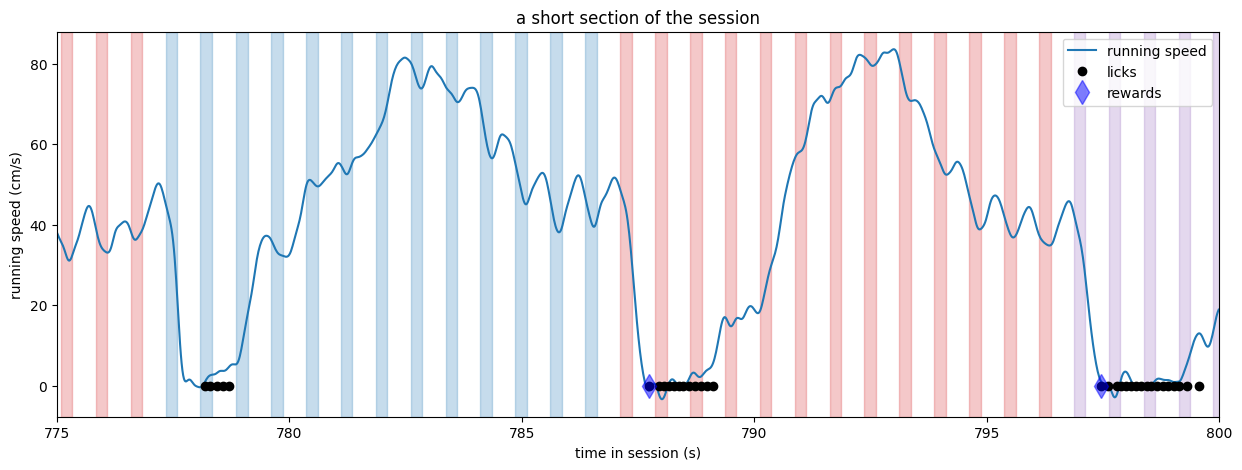

In [18]:
initial_time = 775 # initial time for plot, in seconds
final_time = 800 # final time for plot, in seconds

plt.clf()
fig, ax = plt.subplots(figsize = (15,5))
plot_running(ax, initial_time, final_time)
plot_licks(ax, initial_time, final_time)
plot_rewards(ax, initial_time, final_time)
plot_stimuli(ax, initial_time, final_time)

ax.legend(['running speed', 'licks', 'rewards'])

ax.set_ylabel('running speed (cm/s)')
ax.set_xlabel('time in session (s)')
ax.set_xlim(initial_time, final_time)
ax.set_title('a short section of the session');

## Introduction to the behavior trials table

Now let's explore the behavior trials table. This table contains lots of useful information about every trial in the change detection task.

In [19]:
trials = behavior_session.trials
trials.head()

,start_time,stop_time,initial_image_name,change_image_name,is_change,change_time,go,catch,lick_times,response_time,...,reward_time,reward_volume,hit,false_alarm,miss,correct_reject,aborted,auto_rewarded,change_frame,trial_length
trials_id,,,,,,,,,,,,,,,,,,,,,
0,1.000843,12.777525,im036_r,im078_r,True,8.528410,False,False,"[9.74160359997768, 9.875109600019641, 9.975196...",9.741604,...,8.674043,0.005,False,False,False,False,False,True,510.0,11.776682
1,13.011130,14.412321,im078_r,im078_r,False,NaN,False,False,"[13.928571700002067, 14.112001699977554]",NaN,...,NaN,0.000,False,False,False,False,True,False,NaN,1.401190
2,14.512404,15.379752,im078_r,im078_r,False,NaN,False,False,[15.07956089999061],NaN,...,NaN,0.000,False,False,False,False,True,False,NaN,0.867348
3,16.013679,17.831895,im078_r,im078_r,False,NaN,False,False,"[17.264757600030862, 17.514946899958886]",NaN,...,NaN,0.000,False,False,False,False,True,False,NaN,1.818216
4,18.265613,29.291666,im078_r,im044_r,True,25.042558,False,False,"[25.421669999952428, 25.58848069992382, 25.705...",25.421670,...,25.188221,0.005,False,False,False,False,False,True,1500.0,11.026053


Unlike the stimulus presentations table in which every row corresponded to a visual stimulus presentation, for the behavior trials table every row corresponds to one trial of the change detection task. Here is a quick summary of the columns:

`start_time`: Experiment time when this trial began in seconds.

`end_time`: Experiment time when this trial ended.

`initial_image_name`: Indicates which image was shown before the change (or sham change) for this trial

`change_image_name`: Indicates which image was scheduled to be the change image for this trial. Note that if the trial is aborted, a new trial will begin before this change occurs.

`is_change`: Indicates whether an image change occurred for this trial. 

`change_time`: Experiment time when the task-control computer commanded an image change. This change time is used to determine the response window during which a lick will trigger a reward. Note that for behavior-only sessions, a constant display lag of 20 ms was applied (unlike for behavior+ephys sessions for which this lag was empirically measured for each experiment).

`go`: Indicates whether this trial was a 'go' trial. To qualify as a go trial, an image change must occur and the trial cannot be autorewarded.

`catch`: Indicates whether this trial was a 'catch' trial. To qualify as a catch trial, a 'sham' change must occur during which the image identity does not change. These sham changes are drawn to match the timing distribution of real changes and can be used to calculate the false alarm rate.

`lick_times`: A list indicating when the behavioral control software recognized a lick (sampled at 60 Hz). Note that for behavior-only sessions these are the only lick times provided (unlike for behavior+ephys sessions for which lick times are also recorded at 100 KHz). 

`response_time`: Indicates the time when the first lick was registered by the task control software for trials that were not aborted (go or catch). NaN for aborted trials.

`response_latency`: Indicates the latency at which the first lick was registered by the task control software relative to the change (or sham change) for trials that were not aborted (go or catch). NaN for aborted trials. Inf for trials without a response.

`reward_time`: Indicates when the reward command was triggered for hit trials. NaN for other trial types. 

`reward_volume`: Indicates the volume of water dispensed as reward for this trial. 

`hit`: Indicates whether this trial was a 'hit' trial. To qualify as a hit, the trial must be a go trial during which the stimulus changed and the mouse licked within the reward window (150-750 ms after the change time).

`false_alarm`: Indicates whether this trial was a 'false alarm' trial. To qualify as a false alarm, the trial must be a catch trial during which a sham change occurred and the mouse licked during the reward window.

`miss`: To qualify as a miss trial, the trial must be a go trial during which the stimulus changed but the mouse did not lick within the response window.

`correct_reject`: To qualify as a correct reject trial, the trial must be a catch trial during which a sham change occurred and the mouse withheld licking.

`aborted`: A trial is aborted when the mouse licks before the scheduled change or sham change.

`auto_rewarded`: During autorewarded trials, the reward is automatically triggered after the change regardless of whether the mouse licked within the response window. These always come at the beginning of the session to help engage the mouse in behavior.

`change_frame`: Indicates the stimulus frame index when the change (on go trials) or sham change (on catch trials) occurred. 

`trial_length`: Duration of the trial in seconds.

You can use the `get_performance_metrics` method for a helpful summary of the behavior during this session:

In [20]:
behavior_session.get_performance_metrics()

{'trial_count': 503,
 'go_trial_count': 309,
 'catch_trial_count': 45,
 'hit_trial_count': 136,
 'miss_trial_count': 173,
 'false_alarm_trial_count': 1,
 'correct_reject_trial_count': 44,
 'auto_reward_count': 5,
 'earned_reward_count': 136,
 'total_reward_count': 141,
 'total_reward_volume': 0.7050000000000001,
 'maximum_reward_rate': 4.314648233692634,
 'engaged_trial_count': 354,
 'mean_hit_rate': 0.5204850997120982,
 'mean_hit_rate_uncorrected': 0.5218975290906293,
 'mean_hit_rate_engaged': 0.5895975463227386,
 'mean_false_alarm_rate': 0.07724001259157509,
 'mean_false_alarm_rate_uncorrected': 0.018134469696969694,
 'mean_false_alarm_rate_engaged': 0.08078944987519368,
 'mean_dprime': 1.569242030995491,
 'mean_dprime_engaged': 1.7775127852098909,
 'max_dprime': 2.2113065796444684,
 'max_dprime_engaged': 2.2113065796444684}

Let's calculate the hit rate for each image individually:

In [21]:
hit_miss_table = trials.pivot_table(index='change_image_name', values=['hit', 'miss'], aggfunc=sum)
hit_miss_table['hit_rate'] = hit_miss_table['hit']/(hit_miss_table['hit'] + hit_miss_table['miss'])
hit_miss_table

,hit,miss,hit_rate
change_image_name,,,
im012_r,15,23,0.394737
im036_r,7,33,0.175000
im044_r,25,16,0.609756
im047_r,19,19,0.500000
im078_r,21,16,0.567568
im083_r,5,34,0.128205
im111_r,19,20,0.487179
im115_r,25,12,0.675676


These hit rates are for the entire session, but some mice lose motivation before the end of the session. For these mice, some analyses might benefit from considering only the epochs of the session for which the mouse was engaged. Let's look at a simple engagment index (reward rate) for this session:

Text(0.5, 0, 'Trials')

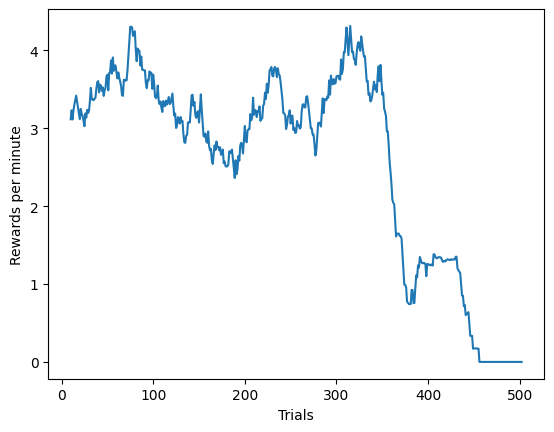

In [22]:
fig, ax = plt.subplots()

rolling_performance = behavior_session.get_rolling_performance_df()

ax.plot(rolling_performance['reward_rate'])
ax.set_ylabel('Rewards per minute')
ax.set_xlabel('Trials')

Looks like the mouse lost motivation around trial 350. Let's recompute our image-wise hit rates using only engaged trials. We'll define this as trials for which the reward rate was > 2 rewards per minute.

In [23]:
engaged_trials = trials[rolling_performance['reward_rate']>2]

hit_miss_table_engaged = engaged_trials.pivot_table(index='change_image_name', values=['hit', 'miss'], aggfunc=sum)
hit_miss_table_engaged['hit_rate'] = hit_miss_table_engaged['hit']/(hit_miss_table_engaged['hit'] + hit_miss_table_engaged['miss'])
hit_miss_table_engaged

,hit,miss,hit_rate
change_image_name,,,
im012_r,15,12,0.555556
im036_r,6,20,0.230769
im044_r,20,6,0.769231
im047_r,18,9,0.666667
im078_r,20,6,0.769231
im083_r,4,22,0.153846
im111_r,19,9,0.678571
im115_r,24,3,0.888889
